<a href="https://colab.research.google.com/github/Roumyajit/OIBSIP/blob/main/oasis_infobyte_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
#lets import the data from google drive
from google.colab import drive
drive.mount('/content/drive')
car_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#lets see the first 5 rows
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#lets see any null value are exist or not ?
#we not found any null value here
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
#lets describe the data
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
#lets see the all car names
car_data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

<ipython-input-21-cdab77ca5fdc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data.Selling_Price)


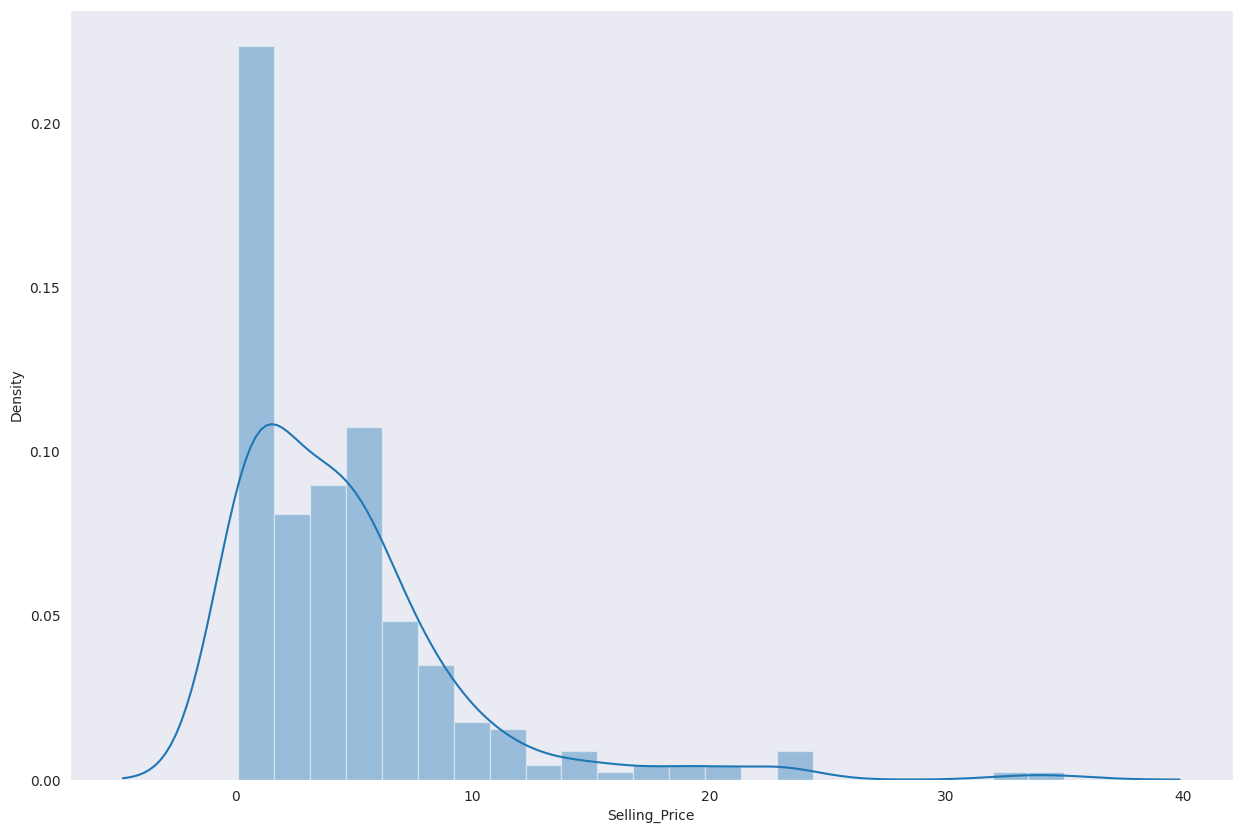

In [21]:
#let’s see the distribution of the values of the selling_price column
sns.set_style("dark")
plt.figure(figsize=(15, 10))
sns.distplot(car_data.Selling_Price)
plt.show()

In [23]:
#lets see the correlation among all the features of this dataset
car_data.corr()

<ipython-input-23-701ed8e4bed7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<ipython-input-28-9057575d0bc4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = car_data.corr()


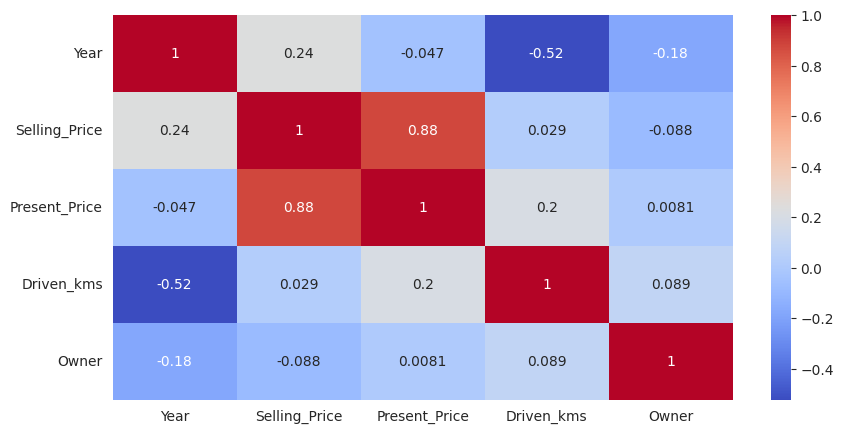

In [28]:
#lets see the heat map
plt.figure(figsize=(10,5))
correlations = car_data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [33]:
# Training a car price prediction model and see the see the accuracy
predict = "Selling_Price"
data = car_data[['Year','Selling_Price','Present_Price','Driven_kms','Owner']]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

<ipython-input-33-e2e5940d22b0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


1.0